# Examen 1: Métodos computacionales.

## Profesor: Hernán Salinas
### Universidad de Antioquia


El examen consta de 7 puntos, cada uno de igual valor, el uso de herramientas de IA no esta permitido. Puede usar la documentacion de scipy, numpy, matplotlib.

La entrega se realiza a través del github del curso.


#### Examen

Una esfera de masa $m$ es lanzada desde la superficie de la tierra con velocidad $\vec{v_0}$. Las fuerzas que actúan sobre la bolita son: el peso $m\vec{g}$, y la fuerza de rozamiento $\vec{f}=-mb\vec{v}_0$ que el  aire ejerce sobre la bolita. Un digrama de cuerpo libre es esquematizado en la siguiente figura.

![Movimiento parabolico](http://www.sc.ehu.es/sbweb/fisica/dinamica/stokes2/stokes1.gif)

Para dar solución al movimiento de la bolita, se debe plantear las ecuaciones de movimiento desde la segunda ley de Newton y después solucionarla para encontrar la ecuaciones de posición y velocidad. Su tarea será determinar el valor del alcance máximo para diferentes ángulos de lanzamiento. Para ello lea detenidamente lo siguiente:  

Las **ecuaciones de movimiento** de la bolita vienen dadas por:
\begin{equation}
m\frac{\mathrm{d}v_x}{\mathrm{d}t} = - mbv_x
\end{equation}


\begin{equation}
m\frac{\mathrm{d}v_y}{\mathrm{d}t} = - mg-mbv_y
\end{equation}


donde:

$v_{0x}=v_0\cos \theta$,  $v_{0y}=v_0\sin \theta$,  $b$ el coeficiente de rozamiento con el aire, y $g$ la aceleración de la gravedad


La solución a las ecuaciones anteriores para la **posición ($x$, $y$) y la velocidad ($v_x$, $v_y$)**  son:


\begin{equation}
x =  \frac{v_{0x}}{b}\left( 1-e^{-bt} \right)
\end{equation}

\begin{equation}
y =  \frac{1}{b}\left( \frac{g}{b}+v_{0y}\right)(1-e^{-bt})-\frac{g}{b}t
\end{equation}


\begin{equation}
v_x = v_{0x}e^{-bt}
\end{equation}

\begin{equation}
v_y = \left(\frac{g}{b}+v_{0y} \right) e^{-bt}-\frac{g}{b}
\end{equation}



**Alcance máximo**

El tiempo asociado al alcance máximo del proyectil se da cuando $x=R$, despejando de la ecuación para $x$ el tiempo, se tiene que:

\begin{equation}
t_v=-\frac{1}{b} \ln \left(1-\frac{Rb}{v_{0x}} \right)
\end{equation}

Reemplanzando en la ecuación para $y$ obtenemos que:
\begin{equation}
y =\left(\frac{g}{b} + v_{0y}  \right) \frac{R}{v_{0x}}+\frac{g}{b^2}\ln \left(1-\frac{Rb}{v_{0x}} \right)
\end{equation}

El alcance máximo R, estará deteminado cuando $y=0$ en la anterior ecuación. Notese que es una ecuación trascendental. Su tarea será determinar el valor de R para diferentes ángulos de lanzamiento, para ello realice lo siguiente:





1. Construir una función de python paramétrica para determinar el valor de R.
$y = f(R, \theta, v_{ox},v_{oy},b,g)$































In [75]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import bisect
from scipy.optimize import newton
from scipy.interpolate import interp1d

In [76]:
g = 9.81


def setup(v0, theta, b):

    v0x = np.cos(theta) * v0
    v0y = np.sin(theta) * v0

    x = lambda t: (v0x / b) * (1 - np.exp(-b * t))
    y = lambda t: (1 / b) * (g / b + v0y) * (1 - np.exp(-b * t)) - (g / b) * t
    vx = lambda t: v0x * np.exp(-b * t)
    vy = lambda t: ((g / b) + v0y) * np.exp(-b * t) - (g / b)

    return x, y, vx, vy, v0x, v0y

def t(R, v0x, b):
    return (-1 / b) * np.log(1 - ((R * b) / v0x))


def f(R, theta, v0, b, color="b"):
    x, y, vx, vy, v0x, v0y = setup(v0, theta, b)
    Y = ((g / b) + v0y) * (R / v0x) + (g / (b**2)) * np.log(1 - ((R * b) / v0x))
    return Y

2. Asumiento que la bolita es lanzada con una rapidez de
$v_0=55\mathrm{m}/\mathrm{s}$ y un ángulo de $45^{\circ}$ respecto a la horizontal, $b=0.005$ y $g=9.8\mathrm{m}/\mathrm{s^2}$, determine el alcance máximo. Emplee el método que desee.

3. Valide el resutado anterior, con un método diferente al que empleo en el apartado anterior y además, determine el tiempo de vuelo $t_v$.  

El resultado con newton es 300.393504347563m
El resultado es 300.39350434756017m
El error absoluto es 2.8421709430404007e-12m
El error relativo es 9.461492681785698e-13%
El tiempo de vuelo es 7.87711608704687s


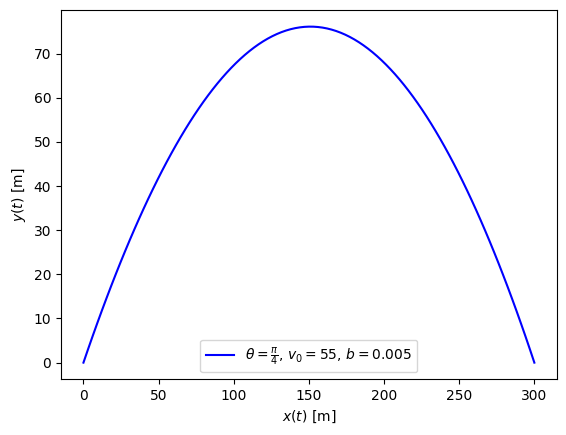

In [77]:
v0 = 55
theta = np.pi / 4
b = 0.005

x, y, vx, vy, v0x, v0y = setup(v0, theta, b)
#Para evitar que el resultado sea 0, se le resta un epsilon
Rmax_analitico = (v0x / b) - 1e-10
Rmax = bisect(f, 1, Rmax_analitico, xtol=1e-16, args=(theta, v0, b))
Rmax_newton = newton(f, Rmax-1e-1, args=(theta, v0, b))
print(f"El resultado con newton es {Rmax_newton}m")
print(f"El resultado es {Rmax}m")
print(f"El error absoluto es {Rmax_newton - Rmax}m")
print(f"El error relativo es {(Rmax_newton - Rmax) / Rmax * 100}%")
print(f"El tiempo de vuelo es {t(Rmax, v0x, b)}s")
t_v = t(Rmax, v0x, b)

plt.plot(
    x(np.linspace(0, t_v, 100)),
    y(np.linspace(0, t_v, 100)),
    color="b",
    label="$\\theta=\\frac{\\pi}{4}$, " + f"$v_0={v0}$" + f", $b={b}$",
)
plt.ylabel("$y(t)$ [m]")
plt.xlabel("$x(t)$ [m]")
plt.legend()
plt.show()

4. Construya una gráfica de $x$ vs $t$, $y$ vs $t$, $x$ vs $y$. Asegurese de  no superar en las trayectorias los tiempos establecidos por el  tiempo de vuelo $t_v$.

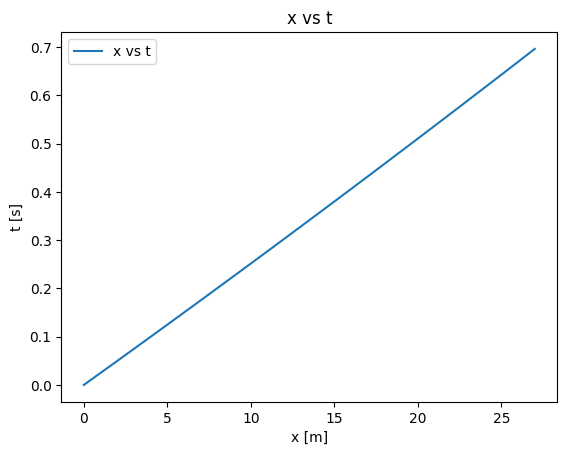

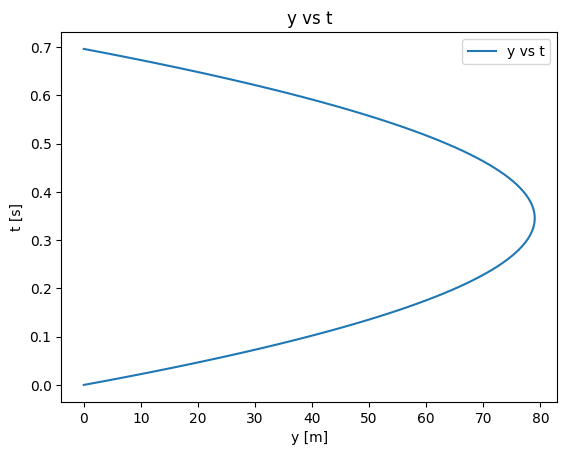

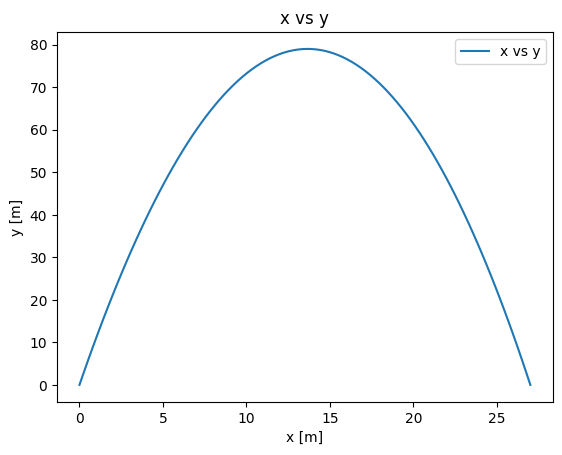

In [81]:
T = lambda x: t(x, v0x, b)
plt.plot(x(np.linspace(0, t_v, 100)), T(np.linspace(0, Rmax, 100)), label="x vs t")
plt.legend()
plt.title("x vs t")
plt.xlabel("x [m]")
plt.ylabel("t [s]")
plt.show()
plt.plot(y(np.linspace(0, t_v, 100)), T(np.linspace(0, Rmax, 100)), label="y vs t")
plt.legend()
plt.title("y vs t")
plt.xlabel("y [m]")
plt.ylabel("t [s]")
plt.show()
plt.plot(x(np.linspace(0, t_v, 100)), y(np.linspace(0, t_v, 100)), label="x vs y")
plt.legend()
plt.title("x vs y")
plt.xlabel("x [m]")
plt.ylabel("y [m]")
plt.show()

Ahora,  vamos a mostrar la trayectoria para múltiples ángulos de lanzamiento.

5. Suponiendo,  $b=0.009$, $v_0 = 40\mathrm{m}/\mathrm{s}$ y  $\theta$ entre $0<\theta<90^{\circ}$ en pasos de $5^{\circ}$:
```python
theta=np.arange(0, 90, 5)
theta=np.deg2rad(theta)
```

generalice el resultado del punto  número 2  para determinar el conjunto de valores de R asociados a cada ángulo. Con lo anterior determine los tiempos de vuelo.

6. Realice un gráfico de $R$ vs $t_v$


7. Finalmente, construya todas las trayectorias ($y$ vs $x$) para cada ángulo $\theta$.


Rmax: 28.201493707540386, t_v: 0.7099940588673782, theta: 0.08726646259971647
Rmax: 55.31263716060918, t_v: 1.4130959012813467, theta: 0.17453292519943295
Rmax: 80.52802787481804, t_v: 2.10401452605416, theta: 0.2617993877991494
Rmax: 103.1088218805874, t_v: 2.777582764883614, theta: 0.3490658503988659
Rmax: 122.40334799010103, t_v: 3.428793572145999, theta: 0.4363323129985824
Rmax: 137.8646719470688, t_v: 4.052834314725751, theta: 0.5235987755982988
Rmax: 149.06473133927668, t_v: 4.645118928694951, theta: 0.6108652381980153
Rmax: 155.70477736392712, t_v: 5.201317840068813, theta: 0.6981317007977318
Rmax: 157.6219719008574, t_v: 5.717385573425097, theta: 0.7853981633974483
Rmax: 154.792095016355, t_v: 6.189585994922339, theta: 0.8726646259971648
Rmax: 147.32841687184884, t_v: 6.614515155086195, theta: 0.9599310885968813
Rmax: 135.47687762701645, t_v: 6.989121711901999, theta: 1.0471975511965976
Rmax: 119.6077984861888, t_v: 7.310724926413153, theta: 1.1344640137963142
Rmax: 100.2044162

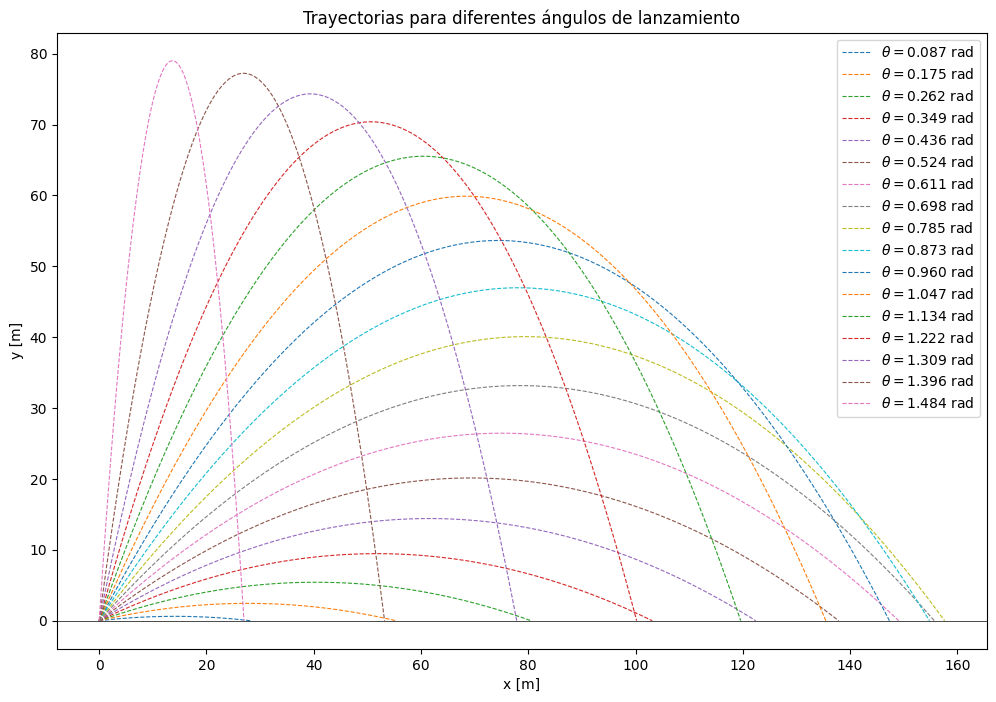

In [79]:
def calcular_trayectoria(v0, angle, b):
    x, y, vx, vy, v0x, v0y = setup(v0, angle, b)
    Rmax_analitico = (v0x / b) - 1e-10
    Rmax = bisect(f, 1, Rmax_analitico, xtol=1e-16, args=(angle, v0, b))
    t_v = t(Rmax, v0x, b)
    return x, y, Rmax, t_v

v0 = 40
b = 0.009
theta = np.arange(5,90, 5)
theta = np.deg2rad(theta)
data = np.zeros((len(theta), 2))
plt.figure(figsize=(12, 8))
plt.xlabel("x [m]")
plt.ylabel("y [m]")
for i, angle in enumerate(theta):
    x, y, Rmax, t_v = calcular_trayectoria(v0, angle, b)
    plt.plot(x(np.linspace(0, t_v, 100)), y(np.linspace(0, t_v, 100)), linestyle='--', linewidth=0.8, label=f"$\\theta={angle:.3f}$ rad")
    data[i, 0] = Rmax
    data[i, 1] = t_v
    print(f"Rmax: {Rmax}, t_v: {t_v}, theta: {angle}")
plt.title("Trayectorias para diferentes ángulos de lanzamiento")
plt.legend()
plt.axhline(0, color='black', linewidth=0.5)
plt.show()


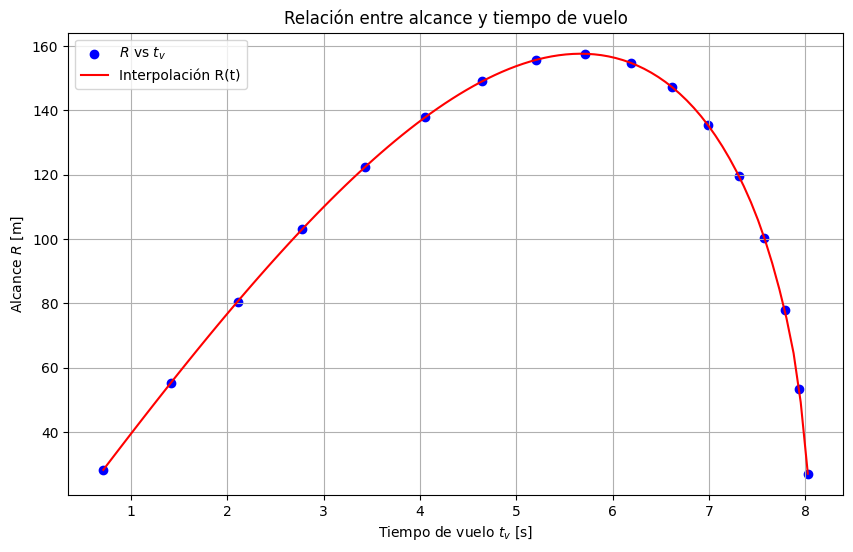

In [80]:
plt.figure(figsize=(10, 6))
plt.scatter(data[:, 1], data[:, 0], color='blue', label="$R$ vs $t_v$")
plt.xlabel('Tiempo de vuelo $t_v$ [s]')
plt.ylabel('Alcance $R$ [m]')
plt.title('Relación entre alcance y tiempo de vuelo')

R_interp = interp1d(data[np.argsort(data[:, 1]), 1], data[np.argsort(data[:, 1]), 0], kind='cubic')

plt.plot(np.linspace(min(data[:, 1]), max(data[:, 1]), 100), R_interp(np.linspace(min(data[:, 1]), max(data[:, 1]), 100)), 'r-', label='Interpolación R(t)')
plt.legend()
plt.grid(True)
plt.show()


